<a href="https://colab.research.google.com/github/smallnoah711/IS_4487_Tokyo/blob/main/Copy_of_day3_lab_retailer_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [4]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl

# Load Data

In [5]:
ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data *italicized text*

➡️ Assignment Tasks

- Describe or profile the dataframe

In [6]:
# prompt: Describe or profile the dataframe

ss.describe()



,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99


In [7]:
ss.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99


# Prepare Data

➡️ Assignment Tasks
- Convert the Total_Amount into a number (not a string)
- Remove rows with empty (NULL) values
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [9]:
ss.dropna(inplace=True)
ss.loc[ss['quantity'] < 0]
ss.drop(ss.loc[ss['quantity'] > 10].index, inplace=True)
ss_filtered = ss[ss['order_year_month'].str.startswith('19')]
ss.drop(ss_filtered.index, inplace=True)
ss.loc[ss['product_price'] < 0]
ss.drop(ss.loc[ss['product_price'] > 1500].index, inplace=True)
years_to_exclude = ['2029', '2421']
filter_condition = ss['order_year_month'].str.startswith(tuple(years_to_exclude))
ss.drop(ss[filter_condition].index, inplace=True)

ss['total_purchase'] = ss['product_price'] * ss['quantity']

In [10]:
ss.describe()

,order_id,quantity,product_price,total_purchase
count,45487.000000,45487.000000,45487.000000,45487.000000
mean,62411.341812,1.581155,302.769664,387.458262
std,6860.601436,0.623101,357.033116,502.702666
min,45080.000000,1.000000,2.290000,2.290000
25%,56563.000000,1.000000,4.990000,9.980000
50%,62428.000000,2.000000,53.990000,53.990000
75%,68292.000000,2.000000,609.630000,630.090000
max,74146.000000,5.000000,1199.000000,3249.950000


# Summarize Data

➡️ Assignment Tasks
- Display the average price per month
- Display the total revenue for all months

In [11]:
ss.groupby('order_year_month')['product_price'].mean()

order_year_month
2020-01    630.090000
2020-02    630.090000
2020-03    630.090000
2020-04    630.090000
2020-05    630.090000
2020-06    630.090000
2020-07    761.770000
2020-08    782.198036
2020-09    768.186610
2020-10    755.632373
2020-11    746.169851
2020-12    785.637000
2021-01    766.248088
2021-02    764.762727
2021-03    761.661711
2021-04    768.971250
2021-05    790.575000
2021-06    768.063529
2021-07    335.981523
2021-08    280.323073
2021-09    280.245339
2021-10    273.811701
2021-11    292.128635
2021-12    303.539611
2022-01    287.019969
2022-02    281.439594
2022-03    291.480761
2022-04    289.837085
2022-05    311.641802
2022-06    297.694494
Name: product_price, dtype: float64

In [12]:
ss.groupby('order_year_month')['total_purchase'].sum()


order_year_month
2020-01      14492.07
2020-02      11971.71
2020-03      12601.80
2020-04      15122.16
2020-05      15122.16
2020-06      17642.52
2020-07      34279.65
2020-08      43803.09
2020-09      45323.01
2020-10      44582.31
2020-11      49993.38
2020-12      78563.70
2021-01      52104.87
2021-02      58886.73
2021-03      57886.29
2021-04      73821.24
2021-05      94869.00
2021-06      78342.48
2021-07     433862.00
2021-08    1249429.93
2021-09    1215651.20
2021-10    1290845.36
2021-11    1347291.65
2021-12    1741846.39
2022-01    1479400.10
2022-02    1375368.38
2022-03    1564681.74
2022-04    1604620.55
2022-05    1817365.75
2022-06    1704542.76
Name: total_purchase, dtype: float64

# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

<Axes: xlabel='order_year_month', ylabel='Total Purchase'>

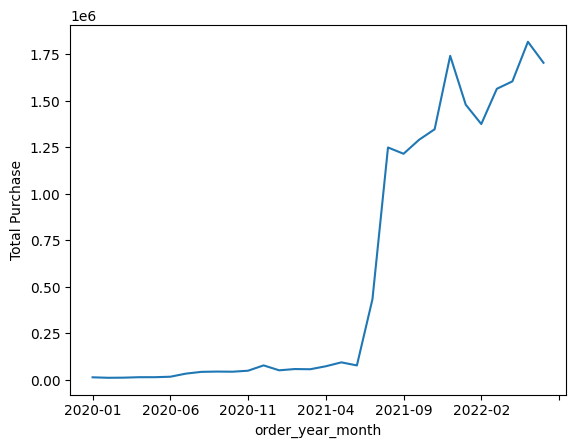

In [13]:
ss.groupby('order_year_month')['total_purchase'].sum().plot(ylabel='Total Purchase')


<Axes: xlabel='order_year_month', ylabel='Average Product Price'>

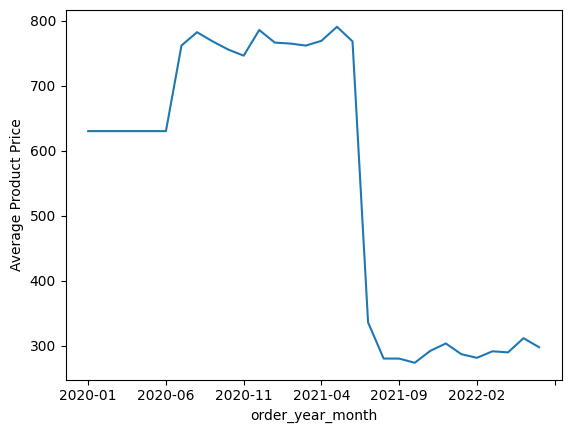

In [14]:
ss.groupby('order_year_month')['product_price'].mean().plot(ylabel='Average Product Price')
